In [1]:
import pandas as pd

weather_data_raw = pd.read_csv("seattle-weather.csv")

weather_data_raw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
weather_data_nodate = weather_data_raw.iloc[:, 1:]
weather_data_nodate.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [6]:
weather_data_raw["date"] = pd.to_datetime(weather_data_raw["date"])


weather_data_raw['month'] = weather_data_raw['date'].dt.month

weather_data_raw.head()

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,1
2,2012-01-03,0.8,11.7,7.2,2.3,rain,1
3,2012-01-04,20.3,12.2,5.6,4.7,rain,1
4,2012-01-05,1.3,8.9,2.8,6.1,rain,1


In [7]:
weather_df = weather_data_raw.iloc[:, 1:]
weather_df.head()

,precipitation,temp_max,temp_min,wind,weather,month
0,0.0,12.8,5.0,4.7,drizzle,1
1,10.9,10.6,2.8,4.5,rain,1
2,0.8,11.7,7.2,2.3,rain,1
3,20.3,12.2,5.6,4.7,rain,1
4,1.3,8.9,2.8,6.1,rain,1


In [8]:
weather_df["weather"].describe()

count     1461
unique       5
top       rain
freq       641
Name: weather, dtype: object

In [9]:
weather_df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [11]:
categorical_vars = ["weather"]
weather_onehot = pd.get_dummies(data = weather_df, prefix = categorical_vars, columns = categorical_vars)
weather_onehot

,precipitation,temp_max,temp_min,wind,month,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,0.0,12.8,5.0,4.7,1,1,0,0,0,0
1,10.9,10.6,2.8,4.5,1,0,0,1,0,0
2,0.8,11.7,7.2,2.3,1,0,0,1,0,0
3,20.3,12.2,5.6,4.7,1,0,0,1,0,0
4,1.3,8.9,2.8,6.1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,12,0,0,1,0,0
1457,1.5,5.0,1.7,1.3,12,0,0,1,0,0
1458,0.0,7.2,0.6,2.6,12,0,1,0,0,0
1459,0.0,5.6,-1.0,3.4,12,0,0,0,0,1


In [14]:
onehot_vars = ['weather_drizzle',
 'weather_fog',
 'weather_rain',
 'weather_snow',
 'weather_sun']
features = [x for x in weather_onehot.columns if x not in onehot_vars]
features

['precipitation', 'temp_max', 'temp_min', 'wind', 'month']

In [18]:
from sklearn.model_selection import train_test_split

label_cols = onehot_vars
x_, x_test, y_, y_test = train_test_split(weather_onehot[features], 
                                          weather_onehot[label_cols],
                                          train_size=0.8,
                                          random_state=42)

x_train, x_dev, y_train, y_dev = train_test_split(x_, 
                                                  y_, 
                                                  train_size=0.75,
                                                  random_state=42)

In [21]:
!pip install xgboost

from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier 

xgbmodel = XGBClassifier(n_estimators = 500, learning_rate = 0.1, verbosity = 1, random_state = 42)
xgbmodel.fit(x_train, y_train, eval_set = [(x_dev, y_dev)], early_stopping_rounds = 10)





[0]	validation_0-logloss:0.61769

[1]	validation_0-logloss:0.55568

[2]	validation_0-logloss:0.50495

[3]	validation_0-logloss:0.46170

[4]	validation_0-logloss:0.42544

[5]	validation_0-logloss:0.39447

[6]	validation_0-logloss:0.36728

[7]	validation_0-logloss:0.34392

[8]	validation_0-logloss:0.32356

[9]	validation_0-logloss:0.30605

[10]	validation_0-logloss:0.29066

[11]	validation_0-logloss:0.27758

[12]	validation_0-logloss:0.26587

[13]	validation_0-logloss:0.25549

[14]	validation_0-logloss:0.24577

[15]	validation_0-logloss:0.23801

[16]	validation_0-logloss:0.23085

[17]	validation_0-logloss:0.22452

[18]	validation_0-logloss:0.21945

[19]	validation_0-logloss:0.21469

[20]	validation_0-logloss:0.21007

[21]	validation_0-logloss:0.20635

[22]	validation_0-logloss:0.20272

[23]	validation_0-logloss:0.19952

[24]	validation_0-logloss:0.19709

[25]	validation_0-logloss:0.19482


/Users/dougdahl/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.

  warnings.warn(


[26]	validation_0-logloss:0.19268

[27]	validation_0-logloss:0.19099

[28]	validation_0-logloss:0.18944

[29]	validation_0-logloss:0.18806

[30]	validation_0-logloss:0.18674

[31]	validation_0-logloss:0.18585

[32]	validation_0-logloss:0.18505

[33]	validation_0-logloss:0.18423

[34]	validation_0-logloss:0.18366

[35]	validation_0-logloss:0.18321

[36]	validation_0-logloss:0.18294

[37]	validation_0-logloss:0.18248

[38]	validation_0-logloss:0.18223

[39]	validation_0-logloss:0.18205

[40]	validation_0-logloss:0.18185

[41]	validation_0-logloss:0.18182

[42]	validation_0-logloss:0.18179

[43]	validation_0-logloss:0.18169

[44]	validation_0-logloss:0.18169

[45]	validation_0-logloss:0.18120

[46]	validation_0-logloss:0.18125

[47]	validation_0-logloss:0.18132

[48]	validation_0-logloss:0.18079

[49]	validation_0-logloss:0.18077

[50]	validation_0-logloss:0.18036

[51]	validation_0-logloss:0.18048

[52]	validation_0-logloss:0.18049

[53]	validation_0-logloss:0.18034

[54]	validation_0-lo

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [22]:
x_test.shape

(293, 5)

In [39]:
from sklearn.model_selection import GridSearchCV
xgbmodel_2 = XGBClassifier(learning_rate = 0.1)

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_child_weight': [10, 15, 20, 25, 30, 35, 40, 45]
}

grid_search_1 = GridSearchCV(xgbmodel_2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_child_weight': [10, 15, 20, 25, 30, 35, 40, 45]},
             scoring='accuracy')

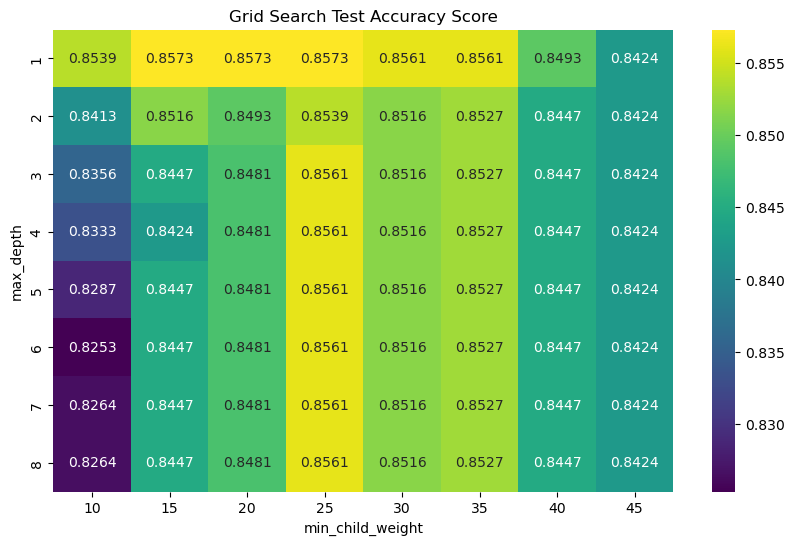

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract mean test scores
mean_test_scores = grid_search_1.cv_results_['mean_test_score']
mean_test_scores = np.array(mean_test_scores).reshape(len(param_grid['max_depth']), len(param_grid['min_child_weight']))

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.4g', cmap='viridis', 
            xticklabels=param_grid['min_child_weight'], 
            yticklabels=param_grid['max_depth'])
plt.xlabel('min_child_weight')
plt.ylabel('max_depth')
plt.title('Grid Search Test Accuracy Score')
plt.show()


In [1]:
### Looks like a max depth of 1 is the best classifier which is weird, also realized here that
### the data was probably skewed and using accuracy wasn't the best way to evaluate the model.
### Switched to f1 below.

(array([ 53.,   0., 641.,   0.,   0., 640.,   0.,  26.,   0., 101.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

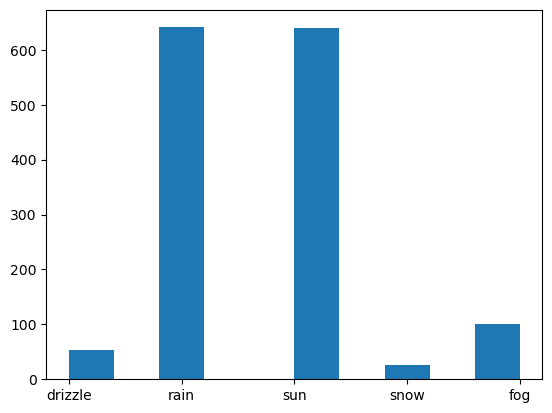

In [33]:
plt.hist(weather_df["weather"])

In [42]:
from sklearn.metrics import make_scorer, f1_score

# Create the XGBoost classifier
xgbmodel_3 = XGBClassifier(n_estimators=500, learning_rate=0.1, verbosity=1, random_state=42)

# Define your parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
    'min_child_weight': [10, 15, 20, 25, 30, 35, 40, 45]
}

# Use F1 score as the scoring metric
f1_scorer = make_scorer(f1_score, average='macro', zero_division=1)  # 'macro' calculates f1 separately for each class and then takes the average 

grid_search_2 = GridSearchCV(xgbmodel_3, param_grid, scoring=f1_scorer, cv=5, verbose=1, n_jobs=-1)

# Splitting your data
x_, x_test, y_, y_test = train_test_split(weather_onehot[features], 
                                          weather_onehot[label_cols],  # Using all 5 one-hot encoded columns as target
                                          train_size=0.8,
                                          random_state=42)

x_train, x_dev, y_train, y_dev = train_test_split(x_, 
                                                  y_, 
                                                  train_size=0.75,
                                                  random_state=42)

grid_search_2.fit(x_train, y_train)

print("Best parameters found: ", grid_search_2.best_params_)


Fitting 5 folds for each of 64 candidates, totalling 320 fits

Best parameters found:  {'max_depth': 2, 'min_child_weight': 10}


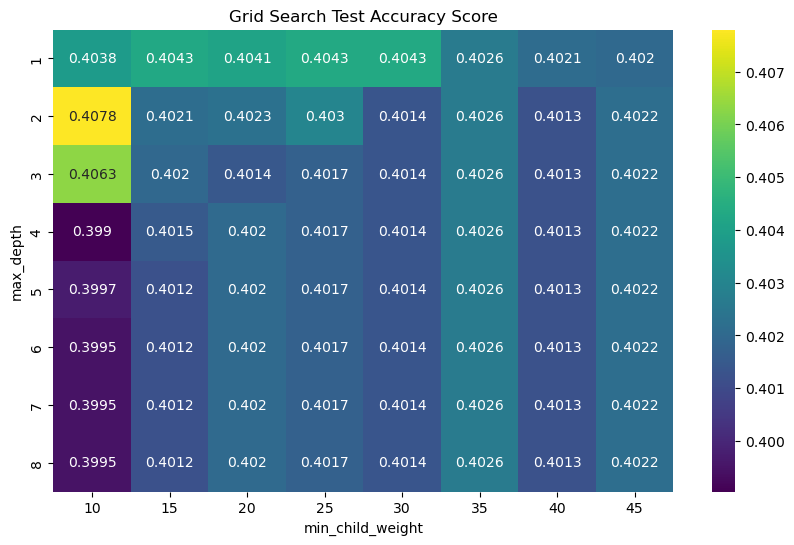

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extract mean test scores
mean_test_scores = grid_search_2.cv_results_['mean_test_score']
mean_test_scores = np.array(mean_test_scores).reshape(len(param_grid['max_depth']), len(param_grid['min_child_weight']))

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_test_scores, annot=True, fmt='.4g', cmap='viridis', 
            xticklabels=param_grid['min_child_weight'], 
            yticklabels=param_grid['max_depth'])
plt.xlabel('min_child_weight')
plt.ylabel('max_depth')
plt.title('Grid Search Test Accuracy Score')
plt.show()


In [50]:
y_pred_1 = xgbmodel.predict(x_dev)
y_pred_2 = grid_search_1.predict(x_dev)
y_pred_3 = grid_search_2.predict(x_dev)

f1 = f1_score(y_dev, y_pred_1, average='macro')
f1_2 = f1_score(y_dev, y_pred_2, average='macro')
f1_3 = f1_score(y_dev, y_pred_3, average='macro')

print(f"F1 Score 1: {f1:.4f}")
print(f"F1 Score 2: {f1_2:.4f}")
print(f"F1 Score 3: {f1_3:.4f}")

F1 Score 1: 0.5290

F1 Score 2: 0.3582

F1 Score 3: 0.3548


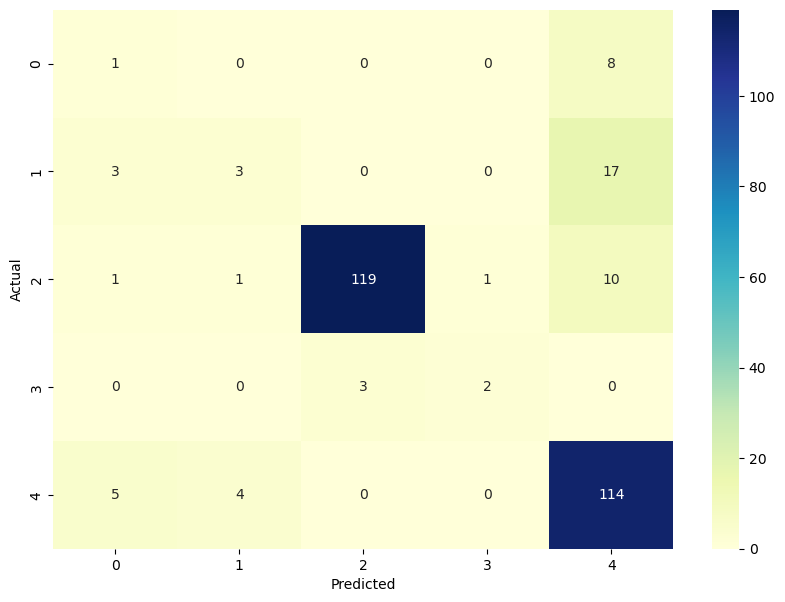

In [55]:
from sklearn.metrics import confusion_matrix

import numpy as np

y_dev_array = y_dev.values

y_dev_label = np.argmax(y_dev_array, axis=1)
y_pred_label = np.argmax(y_pred_1, axis=1)

cm_1 = confusion_matrix(y_dev_label, y_pred_label)


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_1, annot=True, cmap="YlGnBu", fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [46]:
y_pred_1

array([[0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [52]:
y_dev

,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
662,0,0,0,0,1
600,0,0,0,0,1
477,0,0,0,0,1
1057,0,0,1,0,0
1038,0,0,1,0,0
...,...,...,...,...,...
605,0,0,1,0,0
1366,0,0,0,0,1
1390,0,1,0,0,0
419,0,0,1,0,0


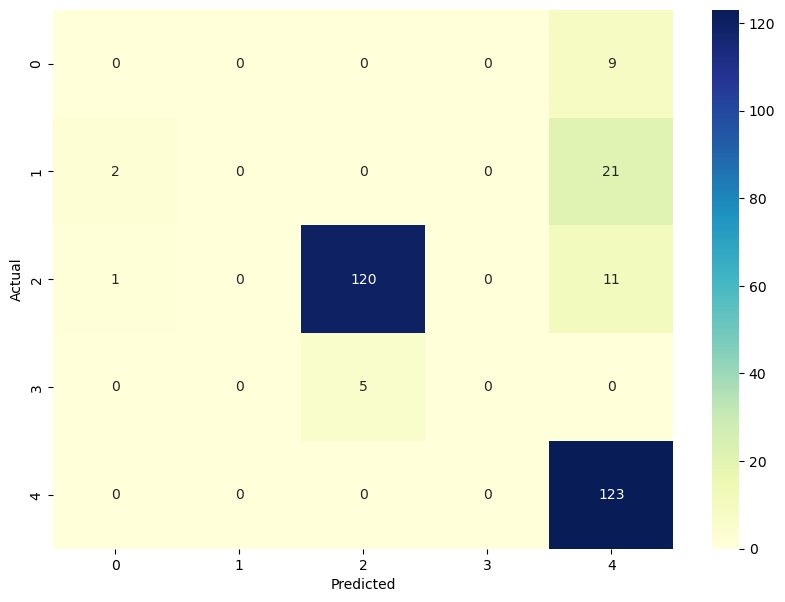

In [56]:
from sklearn.metrics import confusion_matrix

import numpy as np

y_dev_array = y_dev.values

y_dev_label = np.argmax(y_dev_array, axis=1)
y_pred_label = np.argmax(y_pred_2, axis=1)

cm_2 = confusion_matrix(y_dev_label, y_pred_label)


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_2, annot=True, cmap="YlGnBu", fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

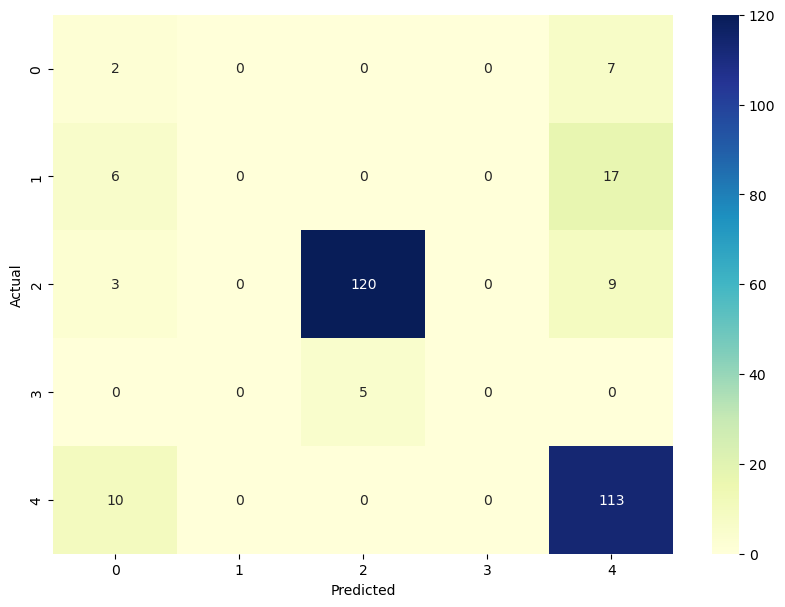

In [57]:
from sklearn.metrics import confusion_matrix

import numpy as np

y_dev_array = y_dev.values

y_dev_label = np.argmax(y_dev_array, axis=1)
y_pred_label = np.argmax(y_pred_3, axis=1)

cm_3 = confusion_matrix(y_dev_label, y_pred_label)


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_3, annot=True, cmap="YlGnBu", fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [58]:
### Apparently using a model with no CV search for hyperparameters performs the best on the dev set.

F1 Score 1: 0.4456


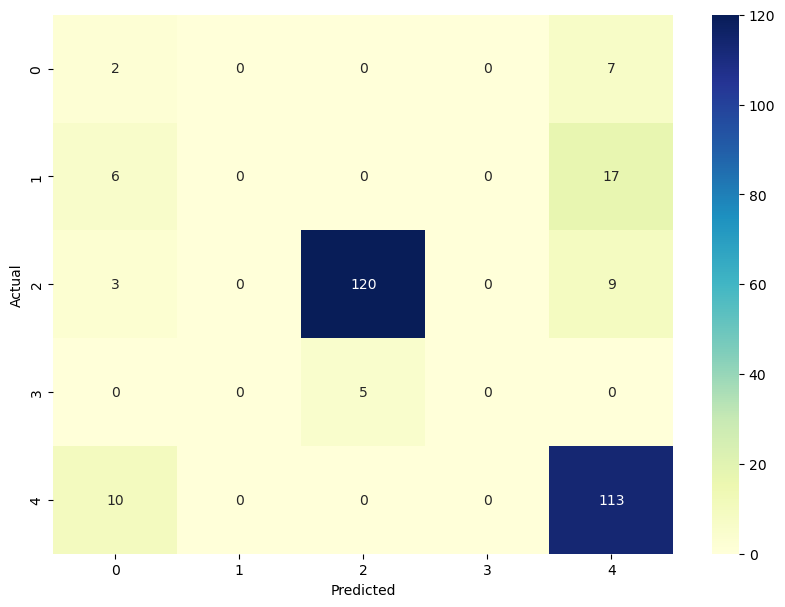

In [59]:
y_pred_test = xgbmodel.predict(x_test)

y_test_array = y_test.values

y_test_label = np.argmax(y_test_array, axis=1)
y_pred_label = np.argmax(y_pred_test, axis=1)

cm_test = confusion_matrix(y_test_label, y_pred_label)

f1 = f1_score(y_test_array, y_pred_test, average='macro')


print(f"F1 Score 1: {f1:.4f}")


# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_3, annot=True, cmap="YlGnBu", fmt="d")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [60]:
### Basically this model is good at predicting sunny and rainy days with high precision and recall, and it's not good at predicting anything else.

In [61]:
importances = xgbmodel.feature_importances_
print(importances)

[0.8634028  0.0318859  0.03890107 0.03002458 0.0357857 ]


In [62]:
### and the REASON that it's good at predicting sunny and rainy days is because the most important feature by far
### is "precipitation". This makes sense, again, because almost all the examples are of sunny or rainy days. 
### Could be a good idea to treat the detection of the other weather events (fog, drizzle, snow) as an anomaly detection 
### problem. Could work in this case, and in any case where the minority classes are very sparse.

In [63]:
### It's not really necessary to scale values before using a tree model because trees/ forests
### split values to reduce entropy, not to reduce error.

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_test, y_test_array))

              precision    recall  f1-score   support



           0       0.00      0.00      0.00         0

           1       0.16      0.50      0.24         8

           2       0.92      0.95      0.93       116

           3       0.12      0.33      0.18         3

           4       0.98      0.78      0.87       165



   micro avg       0.83      0.84      0.83       292

   macro avg       0.44      0.51      0.45       292

weighted avg       0.93      0.84      0.87       292

 samples avg       0.83      0.82      0.83       292




/Users/dougdahl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/Users/dougdahl/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))
